# Langkah 1: Persiapan Data

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Langkah 2: Load dan Gabungkan Data

Baca File CSV

In [2]:
flights = pd.read_csv('/content/drive/MyDrive/#CORE# sirjosephholmes@/@jobs/programmer/Competition - Understanding Flight Delays ✈️/flights.csv')
airlines = pd.read_csv('/content/drive/MyDrive/#CORE# sirjosephholmes@/@jobs/programmer/Competition - Understanding Flight Delays ✈️/airlines_carrier_codes.csv')

Gabungkan Data Maskapai

In [3]:
flights = flights.merge(airlines, left_on='carrier', right_on='Carrier Code', how='left')

# Langkah 3: Pembersihan Data

Cek Data Hilang

In [4]:
print(flights.isnull().sum())

id                    0
year                  0
month                 0
day                   0
dep_time           8255
sched_dep_time        0
dep_delay          8255
arr_time           8713
sched_arr_time        0
arr_delay          9430
carrier               0
flight                0
tailnum            2512
origin                0
dest                  0
air_time           9430
distance              0
hour                  0
minute                0
time_hour             0
name                  0
index             88464
Carrier Code      88464
Airline Name      88464
dtype: int64


Konversi Waktu

In [5]:
# Contoh: Ekstrak jam dan menit dari dep_time
flights['dep_hour'] = flights['dep_time'] // 100
flights['dep_minute'] = flights['dep_time'] % 100

# Langkah 4: Analisis Pertanyaan

Perbandingan Kinerja Maskapai

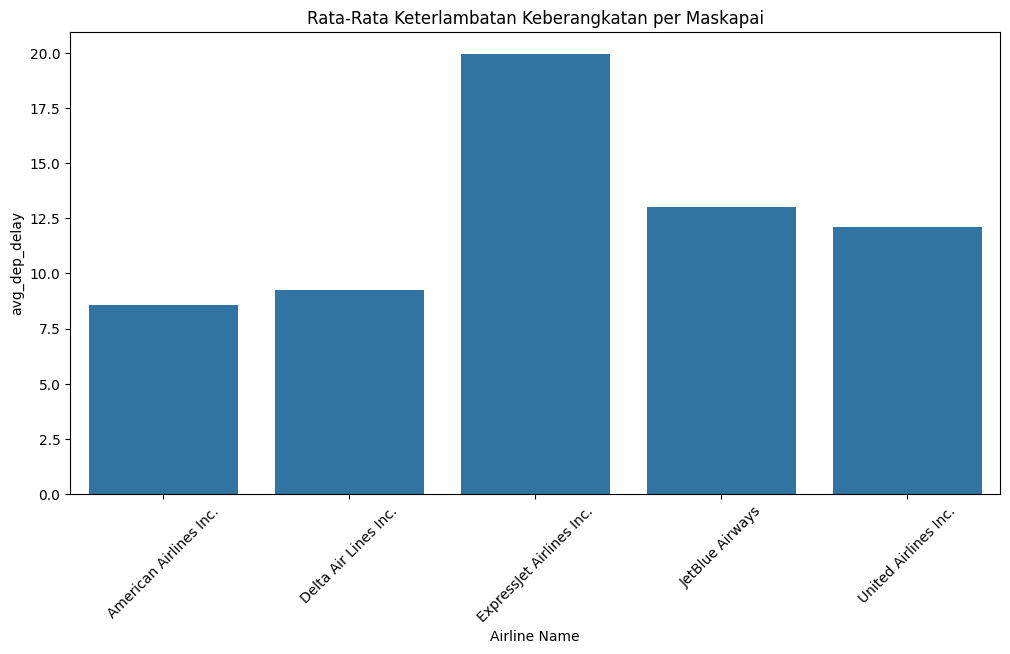

In [6]:
airline_performance = flights.groupby('Airline Name').agg(
    avg_dep_delay=('dep_delay', 'mean'),
    avg_arr_delay=('arr_delay', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Airline Name', y='avg_dep_delay', data=airline_performance)
plt.title('Rata-Rata Keterlambatan Keberangkatan per Maskapai')
plt.xticks(rotation=45)
plt.show()

Tren Keterlambatan Berdasarkan Waktu

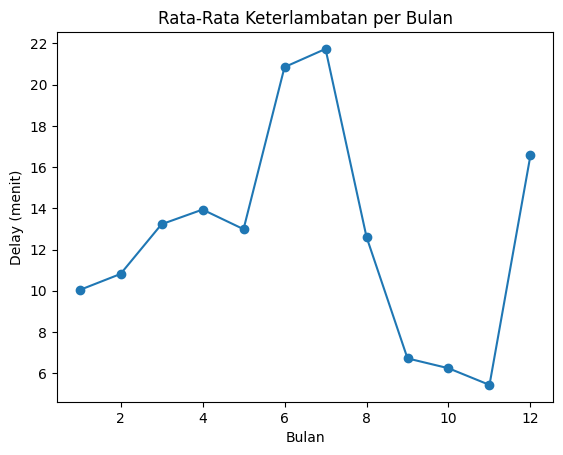

In [7]:
monthly_delay = flights.groupby('month')['dep_delay'].mean()
plt.plot(monthly_delay.index, monthly_delay.values, marker='o')
plt.title('Rata-Rata Keterlambatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Delay (menit)')
plt.show()

Perbandingan Bandara

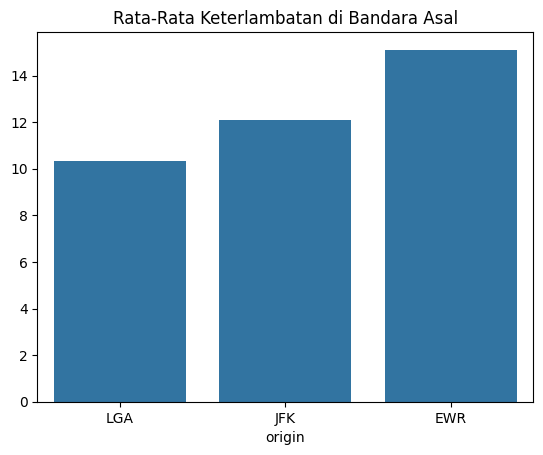

In [8]:
origin_delay = flights.groupby('origin')['dep_delay'].mean().sort_values()
sns.barplot(x=origin_delay.index, y=origin_delay.values)
plt.title('Rata-Rata Keterlambatan di Bandara Asal')
plt.show()

# Langkah 5: Prediksi Keterlambatan (Opsional 1)

Feature Engineering

In [9]:
features = ['month', 'day', 'dep_hour', 'carrier', 'origin', 'dest', 'distance']
X = pd.get_dummies(flights[features])
y = (flights['dep_delay'] >= 15).astype(int)  # Target: delay >=15 menit

Split Data dan Latih Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'Akurasi: {accuracy_score(y_test, predictions):.2f}')

Akurasi: 0.85


# Langkah 6: Analisis Faktor Utama (Opsional 2)

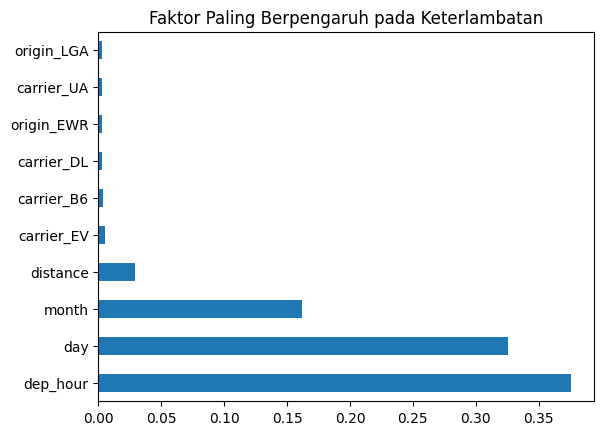

In [11]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Faktor Paling Berpengaruh pada Keterlambatan')
plt.show()